In [1]:
from Propagation import *

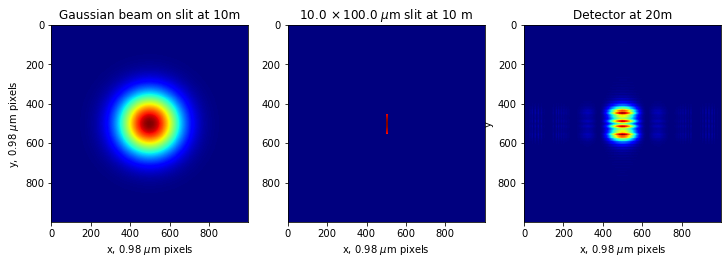

In [2]:
# Gaussian beam, 10m slit, 20m detector
''' Parameters '''
# Gaussian beam
E = 9500
omega = E/hbar
wavelength = 2*np.pi*c/omega
k = omega/c

w0x = 2e-6
w0y = 2e-6
N = 1000

# slit
slit_z = 10
slit_x = 1e1    # um
slit_y = 1e2    # um

# detector
det_z = 20

''' Propagation '''
beam_gaus,x,y = Gaussian_source(E,w0x,w0y,N,slit_z)
beam_slit = Slit(beam_gaus,x,y,slit_x,slit_y)
beam_det = Drift(beam_slit,x,y,wavelength,det_z-slit_z)

''' Plot '''
dx = x[0,1] - x[0,0]
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(Ibeam(beam_gaus),cmap='jet')
plt.xlabel('x, {} $\mu$m pixels'.format(round(dx*1e6,3)))
plt.ylabel('y, {} $\mu$m pixels'.format(round(dx*1e6,3)))
plt.title('Gaussian beam on slit at {}m'.format(slit_z))

plt.subplot(1,3,2)
plt.imshow(Ibeam(beam_slit),cmap='jet')
plt.xlabel('x, {} $\mu$m pixels'.format(round(dx*1e6,3)))
plt.title(r'{}$\,\times${} $\mu$m slit at {} m'.format(slit_x,slit_y,slit_z))

# plot drift
plt.subplot(1,3,3)
plt.imshow(Ibeam(beam_det),cmap='jet')
#plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
#plt.title('detector {}m away'.format(detz-slitz))
plt.title('Detector at {}m'.format(det_z))
plt.xlabel('x, {} $\mu$m pixels'.format(round(dx*1e6,3)))
plt.savefig('Gaussian_Beam_and_Slit_{}-{}.png'.format(slit_z,det_z),transparent=True)

# Work in progress

The following code can not be trusted yet.

lens aperture smaller than beam


Text(0.5, 0, 'x, 0.131 $\\mu$m pixels')

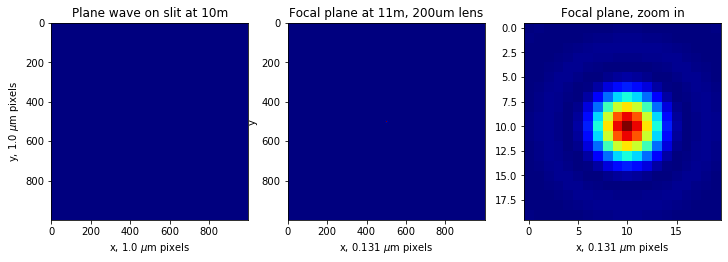

In [101]:
# Plane wave, 10m lens, focal plane detector
def Plane_source(E,z0,N=1000,dx=1e-6):
    omega = E/hbar
    wavelength = 2*np.pi*c/omega
    k = omega/c
    x = np.linspace(-N/2,N/2-1,N) * dx
    x,y = np.meshgrid(x,x)
    beam = np.ones(x.shape) * np.exp(-1j * k * z0)
    return beam, x, y

def Lens(beam,x,y,k,r,f):
    dx = x[0,1] - x[0,0]
    fxMax = 1.0/(2.0*dx)
    N = x.shape[0]
    dfx = fxMax/N
    fx = np.linspace(-fxMax, fxMax-dfx, N)
    fy = np.copy(fx)
    fx, fy = np.meshgrid(fx,fy)

    # lens aperture
    window = window = np.square(x)+np.square(y)<np.square(r/1e6)
    if window.sum() <= window.size:
        print('lens aperture smaller than beam')
    # lens as FFT
    G = NFFT(beam * window)
    # new axis
    wavelength = 2*np.pi/k
    x1 = fx * wavelength * f
    y1 = fy * wavelength * f
    beam_lens = np.exp(1j*k/2/f * (np.square(x1)+np.square(y1)))/1j/wavelength/f * G
    return beam_lens, x1, y1

# Plane wave
E = 9500
omega = E/hbar
wavelength = 2*np.pi*c/omega
k = omega/c

# lens
lens_z = 10
r = 100       # um
f = 1
n = 1

# detector
det_z = lens_z+f

''' Propagation '''
beam_plane,x,y = Plane_source(E,lens_z)
beam_det,x1,y1 = Lens(beam_plane,x,y,k,r,f)
#beam_det = Drift(beam_lens,x1,y1,wavelength,det_z-lens_z)

''' Plot '''
dx = x[0,1] - x[0,0]
dx1 = x1[0,1] - x1[0,0]
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(Ibeam(beam_plane),cmap='jet')
plt.xlabel('x, {} $\mu$m pixels'.format(round(dx*1e6,3)))
plt.ylabel('y, {} $\mu$m pixels'.format(round(dx*1e6,3)))
plt.title('Plane wave on slit at {}m'.format(slit_z))

# plot drift
plt.subplot(1,3,2)
plt.imshow(Ibeam(beam_det),cmap='jet')
#plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
#plt.title('detector {}m away'.format(detz-slitz))
plt.title('Focal plane at {}m, {}um lens'.format(det_z,r*2))
plt.xlabel('x, {} $\mu$m pixels'.format(round(dx1*1e6,3)))
plt.savefig('Plane_wave_and_lens_{}-{}.png'.format(lens_z,det_z),transparent=True)

plt.subplot(1,3,3)
plt.imshow(Ibeam(beam_det)[490:510,490:510],cmap='jet')
plt.title('Focal plane, zoom in')
plt.xlabel('x, {} $\mu$m pixels'.format(round(dx1*1e6,3)))


lens aperture smaller than beam


Text(0.5, 0, 'x, 0.04 $\\mu$m pixels')

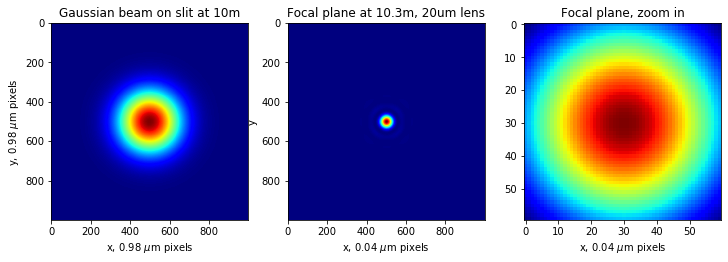

In [102]:
# Gaussian beam, 10m lens, focal plane detector
''' Parameters '''
# Gaussian beam
E = 9500
omega = E/hbar
wavelength = 2*np.pi*c/omega
k = omega/c

w0x = 2e-6
w0y = 2e-6
N = 1000

# lens
lens_z = 10
r = 10       # um
f = 0.3
n = 1

# detector
det_z = lens_z+f

''' Propagation '''
beam_gaus,x,y = Gaussian_source(E,w0x,w0y,N,lens_z)
beam_det,x1,y1 = Lens(beam_gaus,x,y,k,r,f)

''' Plot '''
dx = x[0,1] - x[0,0]
dx1 = x1[0,1] - x1[0,0]
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(Ibeam(beam_gaus),cmap='jet')
plt.xlabel('x, {} $\mu$m pixels'.format(round(dx*1e6,3)))
plt.ylabel('y, {} $\mu$m pixels'.format(round(dx*1e6,3)))
plt.title('Gaussian beam on slit at {}m'.format(slit_z))


# plot drift
plt.subplot(1,3,2)
plt.imshow(Ibeam(beam_det),cmap='jet')
#plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
#plt.title('detector {}m away'.format(detz-slitz))
plt.title('Focal plane at {}m, {}um lens'.format(det_z,r*2))
plt.xlabel('x, {} $\mu$m pixels'.format(round(dx1*1e6,3)))
plt.savefig('Gaussian_Beam_and_lens_{}-{}.png'.format(lens_z,det_z),transparent=True)

plt.subplot(1,3,3)
plt.imshow(Ibeam(beam_det)[470:530,470:530],cmap='jet')
plt.title('Focal plane, zoom in')
plt.xlabel('x, {} $\mu$m pixels'.format(round(dx1*1e6,3)))

In [4]:
# curved mirrors
''' this is really hard to code up.... '''

' this is really hard to code up.... '